# Class 09: Today's Data Wrangling Example 
![Heart](data/valentines-day-2023-6753651837109573.3-law.gif)

Data from Kaggle see [https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)
You can find out more about the original dataset [here.](https://archive.ics.uci.edu/dataset/45/heart+disease)
1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl (1=yes, 0=no)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina (1=yes, 0=no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal:  A blood disorder called thalassemia 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

*target* (0 = no heart disease and 1 = heart disease)

<img src="https://www.wikidoc.org/images/5/53/SinusRhythmLabels.png" alt="EKG Image" width=500, height="auto" class="blog-image">

In [40]:
from datascience import *
import numpy as np
# import for plotting
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Fix for datascience plots
import collections as collections
import collections.abc as abc
collections.Iterable = abc.Iterable

In [41]:
path = 'data/'
data = path + 'heart.csv'
heart = Table.read_table(data)
heart

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1,1,0,2,1
58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# group(): Grouping is a way to summarize rows around one or more quantities

 Table.group(column_or_label, collect=None)
 
 collect: a function applied to values in other columns for each group
 
 ### Grouping by age
We would expect the incidence of heart disease to increase with age

In [42]:
# The default operation when grouping is count()
# The column you group becomes rows, one for each distinct value.
by_age = heart.group("age")
by_age

age,count
29,4
34,6
35,15
37,6
38,12
39,14
40,11
41,32
42,26
43,26


In [43]:
# Returns only one column because the count is the same for all features.
by_age.sort('age') 

age,count
29,4
34,6
35,15
37,6
38,12
39,14
40,11
41,32
42,26
43,26


In [77]:
# The default operation when grouping is count(), but here we ask for median.
import numpy as np

# We get back multiple columns because each feature will have different values
heart.group("age", np.median)

age,sex median,cp median,trestbps median,chol median,fbs median,restecg median,thalach median,exang median,oldpeak median,slope median,ca median,thal median,target median
29,1,1,130,204,0,0,202,0,0,2,0,2,1
34,0.5,2,118,196,0,0.5,183,0,0.35,2,0,2,1
35,1,0,122,192,0,1,174,0,1.4,2,0,2,1
37,0.5,2,125,232.5,0,1,178.5,0,1.75,1,0,2,1
38,1,2,138,175,0,1,173,0,0,2,4,2,1
39,0.5,2,128,219.5,0,1,152,0,0,1,0,2,1
40,1,0,140,199,0,1,178,1,1.4,2,0,3,0
41,1,1,120,204,0,1,168,0,0,2,0,2,1
42,1,1.5,130,242,0,1,162,0,0.3,1.5,0,2,1
43,1,0,126,247,0,1,161,0,1.5,1,0,3,1


## Does the median value of cholestoral increase with age for these patients?

In [45]:
heart.group("age", np.median).select('age', 'chol median')

age,chol median
29,204
34,196
35,192
37,232.5
38,175
39,219.5
40,199
41,204
42,242
43,247


In [46]:
heart.group("age", np.median).select('age', 'chol median').sort('age')

age,chol median
29,204
34,196
35,192
37,232.5
38,175
39,219.5
40,199
41,204
42,242
43,247


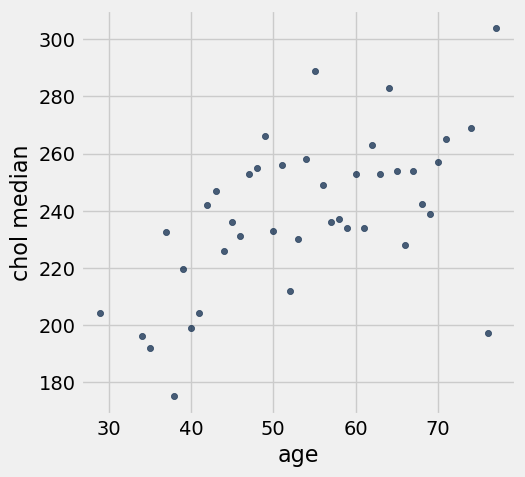

In [47]:
heart.group("age", np.median).select('age', 'chol median').sort('age').scatter('age', 'chol median')

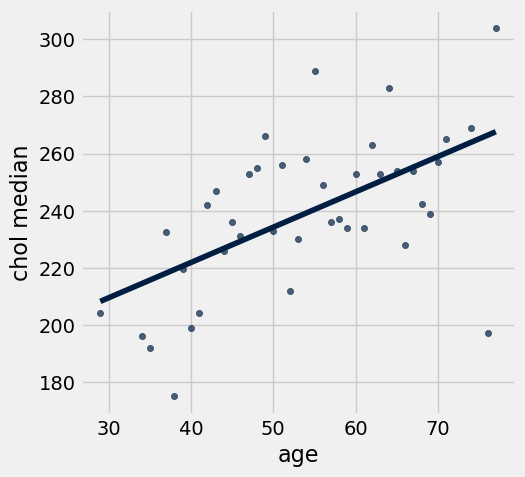

In [48]:
heart.group("age", np.median).select('age', 'chol median').sort('age').scatter('age', 'chol median', fit_line=True)

### Age distribution of study population

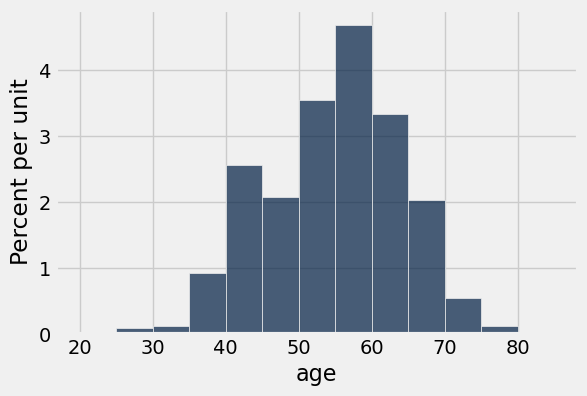

In [49]:
bins = np.arange(20, 90, 5)
heart.hist("age", bins=bins)

# Note percent per unit in this case means percent per year

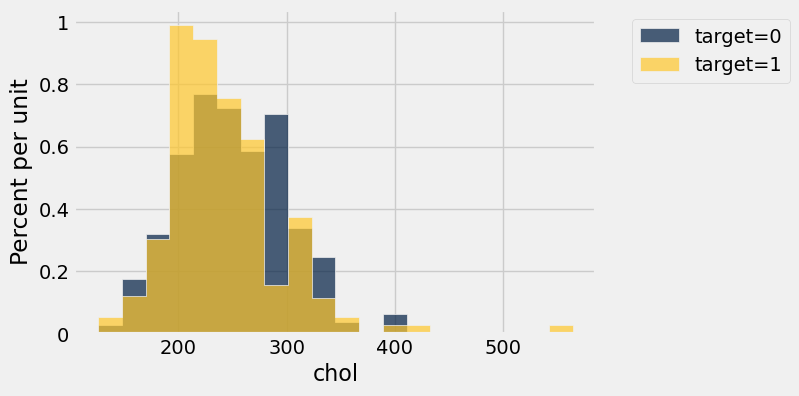

In [50]:
heart.hist("chol", group='target', bins=20)

A surprising result! Can you think of any explanations?

## Grouping on more than one column

In [51]:
# Grouping on multiple columns 
# Creates one row for each unique combination of the grouped column values
heart.group(["sex", "target"])

sex,target,count
0,0,86
0,1,226
1,0,413
1,1,300


### Another example of using a different collection function than the default count()

In [52]:
heart.group("target", np.min)

target,age amin,sex amin,cp amin,trestbps amin,chol amin,fbs amin,restecg amin,thalach amin,exang amin,oldpeak amin,slope amin,ca amin,thal amin
0,35,0,0,100,131,0,0,71,0,0,0,0,0
1,29,0,0,94,126,0,0,96,0,0,0,0,0


### You can also use your own function.
Let's say we want the range of values for each feature as whether or not the patient has heart disease.

In [78]:
def range(x):
    return max(x) - min(x)

In [79]:
# Test our function before we apply it!
from datascience import *

x = make_array(2, 4, 7, 9, 1)
range(x)

8

In [80]:
# Use our function with group()
heart.group("target", range)

target,age range,sex range,cp range,trestbps range,chol range,fbs range,restecg range,thalach range,exang range,oldpeak range,slope range,ca range,thal range
0,42,1,3,100,278,1,2,124,1,6.2,2,4,3
1,47,1,3,86,438,1,2,106,1,4.2,2,4,3


# pivot(): Use the values of a column as the rows for a new table.

According to Wikipedia, "A pivot table is a table of statistics that summarizes the data of a more extensive table (such as from a database, spreadsheet, or business intelligence program). This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way. Pivot tables are a technique in data processing. They enable a person to arrange and rearrange (or "pivot") statistics in order to draw attention to useful information."

We "pivot" the table on one of the columns.

Values in a column become rows

 Table.pivot(columns, rows, values=None, collect=None, zero=None)[source]

    Generate a table with a column for each unique value in columns, with rows for each unique value in rows. Each row counts/aggregates the values that match both row and column based on collect.

In [53]:
# Look at the first three rows of starting data set
heart.show(3)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,1,0,125,212,0,1,168,0,1,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [55]:
# Just as with group() the default collection operation is count()
#------------columns---rows----
heart.pivot('slope', 'target')

target,0,1,2
0,46,324,129
1,28,158,340


In [56]:
#-----------columns---rows---values-----apply-to-values---
heart.pivot('age', 'target', 'chol', collect=np.median)

target,29,34,35,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,74,76,77
0,0,0,198,0,231,219,195,172,315,247,197,286.5,249,259,256,168.5,233,299,212,242.5,239,289,269.5,261,246.5,239,253,234,267,269,309,254,228,237,233.5,254,269,0,0,0,304
1,204,196,187.5,232.5,175,220,199,214,240,247,226,234,200.5,253,250,269,231.5,245,205,230,262.5,262,236,201,230,234,240,243,209,233,263,314.5,253,277,244,236.5,245,265,269,197,0


In [57]:
#--------------------------column----row----values---apply-to-values---
chol_by_age = heart.pivot('target', 'age', 'chol', collect=np.median)
chol_by_age

age,0,1
29,0,204
34,0,196
35,198,187.5
37,0,232.5
38,231,175
39,219,220
40,195,199
41,172,214
42,315,240
43,247,247


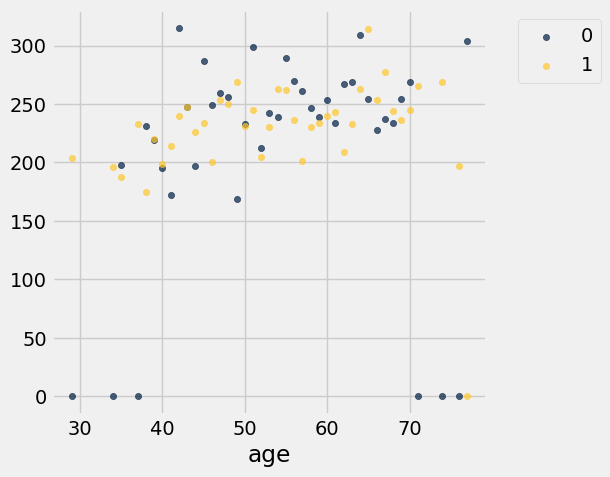

In [58]:
chol_by_age.scatter('age')

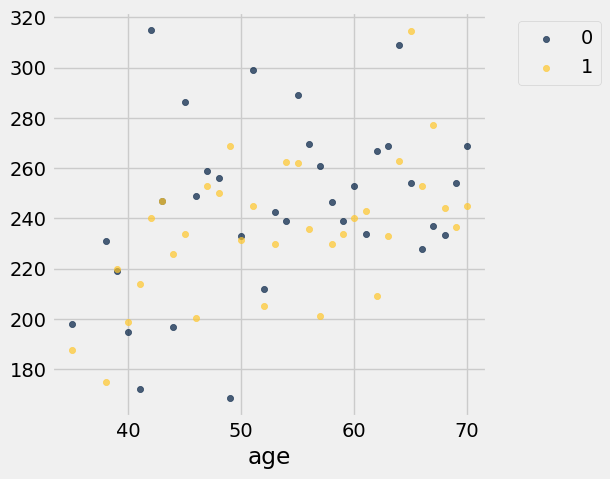

In [83]:
# Eliminate the zeros
chol_by_age = chol_by_age.where('0', are.above(0)).where('1', are.above(0))
chol_by_age.scatter('age')

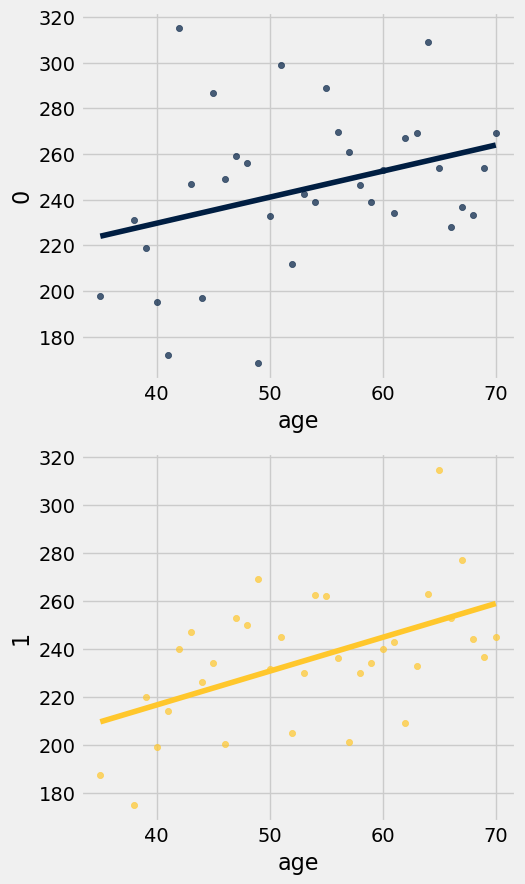

In [84]:
chol_by_age.scatter('age', fit_line=True, overlay=False)

# Summary
Both group() and pivot() are ways to analyze and summarize large datatables. The are powerful techniques for exploratory data analysis.

# PostScript - A Mystery
According to the metadata:

13. thal:  A blood disorder called thalassemia 0 = normal; 1 = fixed defect; 2 = reversable defect

In [99]:
heart.group('thal')

thal,count
0,7
1,64
2,544
3,410


So why are there four values?